## t-distributed stochastic neighbor embedding (t-SNE) is a machine learning algorithm for dimensionality reduction
### well suited for the visualization of high-dimensional datasets

In [13]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

In [2]:
data = pd.read_csv('digit.csv')

In [3]:
data.head(n=6)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = data.loc[:,"pixel0":"pixel783"]#predictors
y = data.label #label is response

In [7]:
from sklearn.decomposition import PCA, RandomizedPCA

In [8]:
pca = PCA(n_components = 30)
X_pca = pca.fit_transform(data)#do a pca first

In [5]:
from sklearn.manifold import TSNE


In [9]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:10000])  

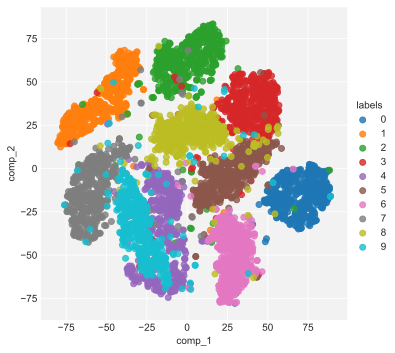

In [14]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(X_tsne)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(5000) ,fit_reg=False)